<a href="https://colab.research.google.com/github/mayank1729/Machine-Learning-Reloaded/blob/master/Evaluating_Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import dataset
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['50_Startups.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


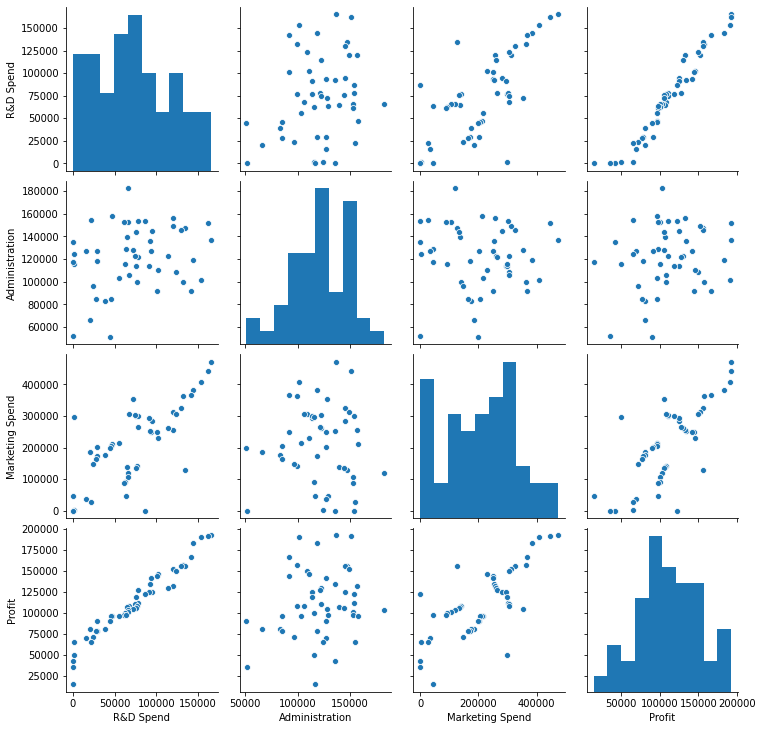

In [5]:
sns.pairplot(df)

In [6]:
X = df.iloc[:, :-1].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [7]:
Y = df.iloc[:,-1].values
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [0]:
#Encoding the categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,-1] = labelencoder_X.fit_transform(X[:,-1])

In [9]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [0]:
#Using OnehotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [11]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [12]:
X = X[:,1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [0]:
#Building the optimal model using Backward Elimination


X = np.append(arr=np.ones((50,1),dtype="int"), values=X, axis=1)

In [14]:
X

array([[1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 1.0, 0.0, 9

In [15]:
import statsmodels.api as sm
X_opt = np.array(X[:, [0, 1, 2, 3, 4, 5]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           1.34e-27
Time:                        17:24:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X_opt = np.array(X[:, [0, 1, 3, 4, 5]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           8.49e-29
Time:                        17:25:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X_opt = np.array(X[:, [0,3, 4, 5]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           4.53e-30
Time:                        17:25:39   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_opt = np.array(X[:, [0,3,5]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           2.16e-31
Time:                        17:26:51   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_opt = np.array(X[:, [0,3]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        17:28:15   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#As the value of adjusted R-square decreased , thus , we won't eliminate the 5th index from our dataset

In [21]:
X_opt = np.array(X[:, [0,3,5]], dtype="float")
X_opt

array([[1.0000000e+00, 1.6534920e+05, 4.7178410e+05],
       [1.0000000e+00, 1.6259770e+05, 4.4389853e+05],
       [1.0000000e+00, 1.5344151e+05, 4.0793454e+05],
       [1.0000000e+00, 1.4437241e+05, 3.8319962e+05],
       [1.0000000e+00, 1.4210734e+05, 3.6616842e+05],
       [1.0000000e+00, 1.3187690e+05, 3.6286136e+05],
       [1.0000000e+00, 1.3461546e+05, 1.2771682e+05],
       [1.0000000e+00, 1.3029813e+05, 3.2387668e+05],
       [1.0000000e+00, 1.2054252e+05, 3.1161329e+05],
       [1.0000000e+00, 1.2333488e+05, 3.0498162e+05],
       [1.0000000e+00, 1.0191308e+05, 2.2916095e+05],
       [1.0000000e+00, 1.0067196e+05, 2.4974455e+05],
       [1.0000000e+00, 9.3863750e+04, 2.4983944e+05],
       [1.0000000e+00, 9.1992390e+04, 2.5266493e+05],
       [1.0000000e+00, 1.1994324e+05, 2.5651292e+05],
       [1.0000000e+00, 1.1452361e+05, 2.6177623e+05],
       [1.0000000e+00, 7.8013110e+04, 2.6434606e+05],
       [1.0000000e+00, 9.4657160e+04, 2.8257431e+05],
       [1.0000000e+00, 9.174

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_opt,Y,test_size=0.2,random_state=0)

#Making the Multiple Linear Regression Model


In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
Y_pred_LR = LR.predict(X_test)
Y_pred_LR

array([102284.64605183, 133873.92383812, 134182.1495165 ,  73701.1069363 ,
       180642.25299736, 114717.24903894,  68335.07575312,  97433.45922275,
       114580.92136452, 170343.31979498])

In [53]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

#Again applying Backward Elimination for SVR,Decision Tree, Random Forest

In [26]:
X_opt_2 = np.array(X[:, [ 1, 2, 3, 4, 5]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt_2,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              727.1
Date:                Sat, 06 Jun 2020   Prob (F-statistic):                    7.87e-42
Time:                        17:55:21   Log-Likelihood:                         -545.15
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1110.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3464.4536   4905.406      0.706      0.484   -6415.541    1.33e+04
x2          5067.8937   4668.238      1.086      0.283   -4334.419    1.45e+04
x3             0.7182      0.066     10.916      0.000       0.586       0.851
x4             0.3113      0.035      8.885      0.000       0.241       0.382
x5             0.0786      0.023      3.429      0.001       0.032       0.125
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.241
Skew:                          -0.237   Prob(JB):                        0.538
Kurtosis:                       2.391   Cond. No.                     8.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X_opt_2 = np.array(X[:, [2, 3, 4, 5]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt_2,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              918.8
Date:                Sat, 06 Jun 2020   Prob (F-statistic):                    3.11e-43
Time:                        17:56:12   Log-Likelihood:                         -545.42
No. Observations:                  50   AIC:                                      1099.
Df Residuals:                      46   BIC:                                      1106.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3486.9078   4074.121      0.856      0.397   -4713.871    1.17e+04
x2             0.7149      0.065     10.953      0.000       0.584       0.846
x3             0.3196      0.033      9.734      0.000       0.253       0.386
x4             0.0826      0.022      3.739      0.001       0.038       0.127
==============================================================================
Omnibus:                        1.503   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.291
Skew:                          -0.224   Prob(JB):                        0.524
Kurtosis:                       2.352   Cond. No.                     5.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_opt_2 = np.array(X[:, [ 3, 4, 5]], dtype="float")
regressor_OLS = sm.OLS(exog=X_opt_2,endog=Y).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):                    1.17e-44
Time:                        17:56:42   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7180      0.065     11.047      0.000       0.587       0.849
x2             0.3277      0.031     10.458      0.000       0.265       0.391
x3             0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         9.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#Splitting the dataset for the optimised X
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(X_opt_2,Y,test_size=0.2,random_state=0)

In [30]:
X_train_2

array([[ 55493.95, 103057.49, 214634.81],
       [ 46014.02,  85047.44, 205517.64],
       [ 75328.87, 144135.98, 134050.07],
       [ 46426.07, 157693.92, 210797.67],
       [ 91749.16, 114175.79, 294919.57],
       [130298.13, 145530.06, 323876.68],
       [119943.24, 156547.42, 256512.92],
       [  1000.23, 124153.04,   1903.93],
       [   542.05,  51743.15,      0.  ],
       [ 65605.48, 153032.06, 107138.38],
       [114523.61, 122616.84, 261776.23],
       [ 61994.48, 115641.28,  91131.24],
       [ 63408.86, 129219.61,  46085.25],
       [ 78013.11, 121597.55, 264346.06],
       [ 23640.93,  96189.63, 148001.11],
       [ 76253.86, 113867.3 , 298664.47],
       [ 15505.73, 127382.3 ,  35534.17],
       [120542.52, 148718.95, 311613.29],
       [ 91992.39, 135495.07, 252664.93],
       [ 64664.71, 139553.16, 137962.62],
       [131876.9 ,  99814.71, 362861.36],
       [ 94657.16, 145077.58, 282574.31],
       [ 28754.33, 118546.05, 172795.67],
       [     0.  , 116983.8 ,  451

In [35]:
Y_train_2

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

#Making Decision Tree prediciton 


In [31]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train_2,Y_train_2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [32]:
Y_pred_DT = dtree.predict(X_test_2)
Y_pred_DT

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 108733.99,
        71498.49,  99937.59, 108733.99, 156991.12])

In [51]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

#Making Random Forest predicton 

In [58]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=450,random_state=0)
rforest.fit(X_train_2,Y_train_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=450, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [59]:
Y_pred_RF = rforest.predict(X_test_2)
Y_pred_RF

array([102870.06217778, 136579.70553333, 136282.10048889,  80151.11942222,
       182584.25986667, 113071.86235556,  70898.56813333,  99607.43628889,
       111660.25802222, 169083.13877778])

In [50]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

#Making SVR predicions (using both 'rbf' and 'poly' kernel)

In [0]:
#Applying feature scaling here
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_fs = sc_X.fit_transform(X_train_2)
X_test_fs = sc_X.transform(X_test_2)

In [37]:
X_train_fs

array([[-0.35006454, -0.78547109,  0.1011968 ],
       [-0.55530319, -1.48117426,  0.02734979],
       [ 0.07935762,  0.80133381, -0.55152132],
       [-0.54638238,  1.32505817,  0.07011684],
       [ 0.43485371, -0.35598663,  0.75148516],
       [ 1.26943143,  0.85518519,  0.98603118],
       [ 1.04525007,  1.28077047,  0.4404    ],
       [-1.529843  ,  0.02942065, -1.6218751 ],
       [-1.53976251, -2.76767264, -1.6372965 ],
       [-0.13115188,  1.14497701, -0.76949991],
       [ 0.92791613, -0.02992062,  0.48303162],
       [-0.20932933, -0.2993768 , -0.89915412],
       [-0.17870828,  0.2251352 , -1.26401642],
       [ 0.1374709 , -0.06929437,  0.50384666],
       [-1.03967624, -1.05076697, -0.43852106],
       [ 0.09938348, -0.36790317,  0.781818  ],
       [-1.21580174,  0.15416247, -1.34947778],
       [ 1.05822437,  0.97836757,  0.88670051],
       [ 0.4401196 ,  0.46754749,  0.40923215],
       [-0.15151937,  0.62430586, -0.51983056],
       [ 1.30361149, -0.91073517,  1.301

In [38]:
Y_train_2.shape

(40,)

In [0]:
Y_train_2 = Y_train_2.reshape(-1,1)
Y_test_2 = Y_test_2.reshape(-1,1)

In [0]:
sc_Y = StandardScaler()
Y_train_fs = sc_Y.fit_transform(Y_train_2)
Y_test_fs = sc_Y.transform(Y_test_2)

In [42]:
Y_train_fs

array([[-0.31304376],
       [-0.32044287],
       [-0.09175449],
       [-0.31467774],
       [ 0.3662475 ],
       [ 1.14433163],
       [ 0.57224308],
       [-1.10020076],
       [-1.82310158],
       [-0.20861649],
       [ 0.50587547],
       [-0.23498575],
       [-0.29700745],
       [ 0.43361398],
       [-0.93778138],
       [ 0.22309235],
       [-0.98076868],
       [ 1.05682957],
       [ 0.61437014],
       [-0.05046517],
       [ 1.17493831],
       [ 0.39351679],
       [-0.77118537],
       [-2.34186247],
       [ 2.03494965],
       [ 0.79423047],
       [-0.48182335],
       [-0.02210286],
       [ 1.15347296],
       [-0.01760646],
       [-0.46306547],
       [ 0.04612731],
       [ 0.32942519],
       [ 0.9962397 ],
       [-0.70283485],
       [-1.4816433 ],
       [ 1.81525556],
       [ 2.04655875],
       [-1.65292476],
       [-1.09342341]])

In [45]:
#Training the model

#Applying the rbf kernel
from sklearn.svm import SVR
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X_train_fs,Y_train_fs)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
Y_pred_rbf = sc_Y.inverse_transform(regressor_rbf.predict(X_test_fs))
Y_pred_rbf

array([100160.05210776, 122549.42139322, 131502.13740292,  78872.3678589 ,
       162946.50120064, 121600.82914911,  81081.26971832,  97033.72585873,
       121069.83056306, 147031.29084299])

In [52]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [47]:
#Applying the polynomial kernel
regressor_poly = SVR(kernel='poly')
regressor_poly.fit(X_train_fs,Y_train_fs)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
Y_pred_poly = sc_Y.inverse_transform(regressor_poly.predict(X_test_fs))
Y_pred_poly

array([ 86808.2351987 , 122566.34569432, 114006.78652461,  83976.34020306,
       215618.91320075, 103679.36461462,  53886.06332925, 101145.08564844,
       107556.58589655, 197030.83839337])

In [49]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])